In [ ]:
import pandas as pd
import numpy as np
import datetime

In [ ]:
#loading the 'marketing_customer_analytics.csv' in the df called 'file'
#index_col=[0] means that the first column is the index
file = pd.read_csv('/Users/estelaoshiro/Desktop/Ironhack/Week_1/Day_2/Afternoon/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv', index_col=[0])

In [3]:
#taking a look at the data
file

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
#shape of the dataframe 'file'
file.shape

(10910, 25)

In [5]:
#standardizing header names
#checking first the column names
column_name = file.columns
column_name

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [6]:
#changing column names to lowercase and replacing blank spaces by underscore
new_column_name = [] #creating an empty list to store the standardized column names
for name in column_name: #for loop to go through the column names
    name = name.lower() #changing the names to lowercase
    name = name.replace(" ", "_") #replacing blank spaces by underscore
    new_column_name.append(name) #adding the new column names to the list created
file.columns = new_column_name #assigning the new column names to the original column name

print(column_name)

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')


In [7]:
#showing numerical and categorical columns 
# print(file.select_dtypes(object)) #shows categorical columns and some rows. important to check if it makes sense.
# print(file.select_dtypes(int)) #shows integer columns (numerical)
# print(file.select_dtypes(np.float64)) #shows float columns (numerical)
file.dtypes #fast option to check the type of each column

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [8]:
#creating a dataframe copy to do the next modifications
file_cleaned = file.copy()

In [9]:
#removing duplicate rows
file_cleaned = file_cleaned.drop_duplicates()
file_cleaned.shape

(10873, 25)

In [10]:
#checking missing values
print(file_cleaned.isna().sum())

print(file_cleaned['response'].unique())
print(file_cleaned['vehicle_size'].unique())

#the column with most missing values (almost half missing values). However it contains just NaN and 'A'.
print(file_cleaned['vehicle_type'].unique())   
# state
# response
# months_since_last_claim  
# number_of_open_complaints 
# vehicle_class                    
# vehicle_size                      
# vehicle_type 

customer                            0
state                             614
customer_lifetime_value             0
response                          614
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           623
months_since_policy_inception       0
number_of_open_complaints         623
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     608
vehicle_size                      608
vehicle_type                     5465
dtype: int64
['No' 'Yes' nan]
['Medsize' 'Small' '

In [11]:
#drop column 'vehicle_type' because it contains only 'A' and Nan and almost half of the values are missing. 
#As this column does not add relevant information, I decided to drop it.
file_cleaned = file_cleaned.drop('vehicle_type', axis=1)

In [12]:
#Both columns 'vehicle_class' and 'vehicle_size' have the same amount of missing values
#Checking if the same missing values in 'vehicle_class' correspond to the same missing values in 'vehicle_size'
file_cleaned['vehicle_class'].isna().equals(file_cleaned['vehicle_size'].isna())
#As it returned True and the missing values correspond to approximately 6% of the dataset, I'll delete all the rows with NaN
file_cleaned = file_cleaned[file_cleaned['vehicle_class'].isna()==False]
file_cleaned.shape

(10265, 24)

In [13]:
#verifying that there's no missing values in 'vehicle_class' and 'vehicle_size'
file_cleaned.isna().sum()

customer                           0
state                            585
customer_lifetime_value            0
response                         585
coverage                           0
education                          0
effective_to_date                  0
employmentstatus                   0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto               0
months_since_last_claim          583
months_since_policy_inception      0
number_of_open_complaints        583
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount                 0
vehicle_class                      0
vehicle_size                       0
dtype: int64

In [14]:
#Both columns 'months_since_last_claim' and 'number_of_open_complaints have the same amount of missing values
#Checking if the same missing values in 'months_since_last_claim' correspond to the same missing values in 'number_of_open_complaints'
file_cleaned['months_since_last_claim'].isna().equals(file_cleaned['number_of_open_complaints'].isna())
#As it returned True and the missing values correspond to approximately 5% of the dataset, I'll delete all the rows with NaN
file_cleaned = file_cleaned[file_cleaned['months_since_last_claim'].isna()==False]

file_cleaned.isna().sum()

customer                           0
state                            548
customer_lifetime_value            0
response                         548
coverage                           0
education                          0
effective_to_date                  0
employmentstatus                   0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto               0
months_since_last_claim            0
months_since_policy_inception      0
number_of_open_complaints          0
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount                 0
vehicle_class                      0
vehicle_size                       0
dtype: int64

In [15]:
#For the last 2 columns containing missing values 'state' and 'response'
#I decided to deal with them in the end because I consider state an import column to analyze.
#If 'state' was the only column left with NaN, I'd fill the values with the mode.
file_cleaned['state'].isna().equals(file_cleaned['response'].isna())
#However, both columns have the same missing values, and in 'response' I can't fill the values response based on some criteria.
#I could guess 'yes' or 'no', having 50% of chance to be correct. But I also would have to fill the state's missing values.
#I also decided to delete the rows.
file_cleaned = file_cleaned[file_cleaned['state'].isna()==False]
file_cleaned.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [16]:
#Overall considerations dealing with missing values
#As I don't have a context to fully understand each row and I don't have other sources to get the data I need
#I deleted roughly 15% of the rows and 1 full column.
file_cleaned.shape

(9134, 24)

In [17]:
#datetime format
file_cleaned['month']=pd.DatetimeIndex(file_cleaned['effective_to_date']).month #creating a column named 'month' and extracting the month from the column 'effective_to_date'
file_cleaned['month']

0        2
1        1
2        2
3        1
6        2
        ..
10903    1
10904    2
10906    1
10907    2
10908    2
Name: month, Length: 9134, dtype: int64

In [18]:
file_cleaned.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2


In [19]:
#checking which months the column 'month' has
file_cleaned['month'].unique()

#filtering the first quarter (jan, feb)
file_cleaned[(file_cleaned['month'].isin([1,2]))] #filters the months 1 and 2 (that's equal to the orignal data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


In [20]:
#LAB CUSTOMER ANALYSIS ROUND 3

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#describing DataFrame
file_cleaned.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


[Text(0.5, 1.0, 'Number of response')]

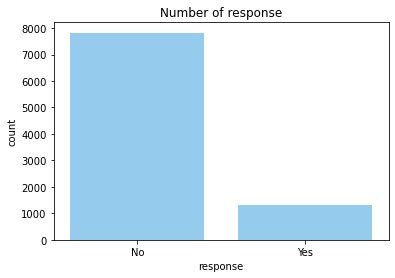

In [23]:
#plotting the total number of responses
#seaborn countplot to get the total number of response 'yes' and 'no'
sns.countplot(x=file_cleaned['response'], color='lightskyblue').set(title='Number of response')

[Text(0.5, 1.0, 'Response rate by sales channel')]

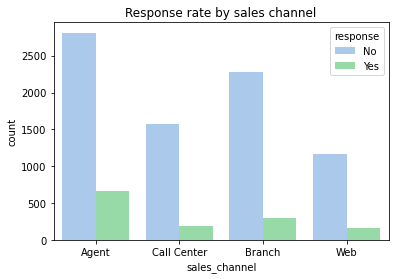

In [24]:
#plotting the response rate vs sales channel
sns.countplot(data=file_cleaned, x='sales_channel', hue='response', palette='pastel6').set(title='Response rate by sales channel')

 

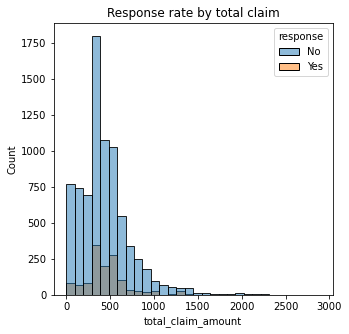

In [38]:
#plotting the total number of responses vs total claim amount
fig, ax1 = plt.subplots(figsize=(5,5))
sns.histplot(x='total_claim_amount', hue='response', data=file_cleaned, bins=30).set(title='Response rate by total claim')
plt.show()

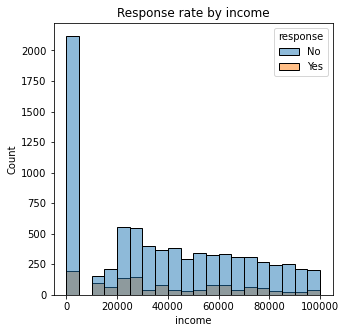

In [41]:
#plotting the total number of responses vs income
fig, ax1 = plt.subplots(figsize=(5,5))
sns.histplot(x='income', hue='response', data=file_cleaned, bins=20).set(title='Response rate by income')
plt.show()